In [31]:
# DFS to find biconnected component

from collections import defaultdict
from time import time

import sys


# The class for graph
class Graph:

    def __init__(self):
        
        # Default the set of nodes and edges in graph
        self.edges = set()
        self.nodes = set() 

        # default dictionary to store graph edges
        self.graph = defaultdict(list)

        # default dictionary to store LOW number of each node
        self.low_number = defaultdict(int)

        # default dictionary to store DFS search sequence number of each node
        self.dfs_number = defaultdict(int)

        # set a counter for the DFS # in the DFS tree
        self.dfs_counter = 0

        # default a list to store the biconnected components
        self.bicomp = list()

        # default a set for the articulation points
        self.articulations = set()

        # default a direction tree with DFS pash
        self.dfs_tree = defaultdict(list)

    # function to add an edge to graph
    def add_edge(self, u, v):

        if u in self.graph[v]:                  # Check if the edge already have
            print(f'edge ({u},{v}) exists')
        else:
            self.graph[u].append(v) 
            self.graph[v].append(u)
            
            # Update the edges and nodes list
            self.edges.add((v,u))
            self.nodes = set(self.graph.keys())
            
            # reset bfs abd low number
            self.low_number = defaultdict(int)
            self.dfs_number = defaultdict(int)


    # Function to add multiple edges from a list
    def add_Edge_from_list(self,edgelist):
        for edge in edgelist:
            self.add_edge(edge[0],edge[1])


    # Global initialization for DFS
    def initialization(self):
        # Set the DFS number for all the nodes to -1
        for i in self.nodes:
            self.dfs_number[i] = -1
        
        # Set DFS discover counter to 0
        self.dfs_counter = 0

    
    def DFS(self):
        self.initialization()
        store = list()
        for node in self.nodes:
            if self.dfs_number[node] == -1:
                # Call the DFS travl
                self.__dfs(node, store)
        


    def __dfs(self, v, store):
        # Initialization
        self.dfs_counter += 1
        self.dfs_number[v] = self.dfs_counter
        self.low_number[v] = self.dfs_counter

        for x in self.graph[v]:
            if self.dfs_number[x] == -1:       # x is undiscovered
                store += [(v,x)]
                self.dfs_tree[v].append(x)
                
                self.__dfs(x, store)

                self.low_number[v] = min(self.low_number[v], self.low_number[x])
                

                if self.low_number[x] >= self.dfs_number[v]:

                    # In this algorithm, every root point will become to articulation points
                    # Use this to check if the root point is a articulation point.
                    if not (self.dfs_number[v] == 1 and self.low_number[x] == self.dfs_number[v]):
                        self.articulations.add(v)

                    # Store the biconnnected components list       
                    bicomp = []
                    a=()
                    while a != (v,x):
                        a = store.pop()
                        bicomp += [a]
                    self.bicomp += [bicomp]

            elif v not in self.dfs_tree[x]:            # x is not v's parent
                # Check the edges if already been exposed
                if self.dfs_number[v] > self.dfs_number[x]:   
                    store += [(v,x)]                            
                self.low_number[v] = min(self.low_number[v], self.dfs_number[x])

 
def main():
    # Try to open each file by sequence
    for i in range(1,len(sys.argv)):
        test_name = sys.argv[i]
        test = None
        try:
            test = open(test_name,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 1000

            if len(G.nodes) <= 20:
                # Print biconnected comoponents
                for i in range(len(G.bicomp)):
                    print('Component %d :   ' %(i+1), end = '{' )

                    l = len(G.bicomp[i])
                    for edge in G.bicomp[i]:
                        if edge == G.bicomp[i][l-1]:
                            print(set(edge), end='} \n')
                        else:
                            print(set(edge), end=', ')

                print('Articulations: ', G.articulations)
            
            print('Summary: %s, %d, %d, %d, %d, %f' % (test_name, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            print()

def test():
    G=Graph()
    edges = [(1,2),(1,3),(2,3),(1,4),(4,5),(4,6),]
    G.add_Edge_from_list(edges)
    G.DFS()
    for i in range(len(G.bicomp)):
        print('Component %d:   ' %(i+1), end = '{' )

        l = len(G.bicomp[i])
        for edge in G.bicomp[i]:
            if edge == G.bicomp[i][l-1]:
                print(set(edge), end='} \n')
            else:
                print(set(edge), end=',')

    
    print('Articulations: ', G.articulations)
    print('Summary: %s, %d, %d, %d' % (len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp)))
    print()


if __name__ == '__main__':
    #main()
    test()



Component 1:   {{1, 3},{2, 3},{1, 2}} 
Component 2:   {{4, 5}} 
Component 3:   {{4, 6}} 
Component 4:   {{1, 4}} 
Articulations:  {1, 4}
Summary: 6, 6, 2, 4



In [32]:
import pandas as pd
from glob import glob

In [33]:
def cvs():
    # Try to open each file by sequence
    df = pd.DataFrame(columns=['nodes_number','edges_number','run_time'])

    for file in glob('tests/*.txt'):

        test = None
        try:
            test = open(file,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 1294

            #print('Summary: %s, %d, %d, %d, %d, %f' % (file, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            #print()

            df = df.append({'nodes_number' : len(G.nodes), 'edges_number' : len(G.edges), 'run_time' : run_time}, ignore_index=1)

    return df  
        
df = cvs()

In [34]:
print(df)

    nodes_number  edges_number   run_time
0           64.0         428.0   0.684900
1          128.0        1224.0   2.370927
2          128.0        1373.0   2.158670
3           16.0          58.0   0.107054
4           64.0         373.0   0.555325
..           ...           ...        ...
58         256.0        1508.0   2.375555
59          16.0          38.0   0.089160
60          16.0          62.0   0.092863
61         256.0        1492.0   2.290405
62         512.0       11213.0  15.914985

[63 rows x 3 columns]


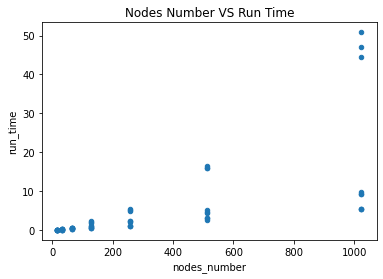

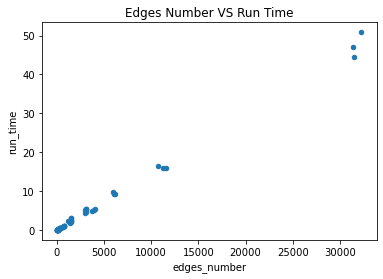

In [35]:
import matplotlib as plt

node_plot = df.plot.scatter(x='nodes_number', y='run_time', title='Nodes Number VS Run Time')

edge_plot = df.plot.scatter(x='edges_number', y='run_time', title='Edges Number VS Run Time')

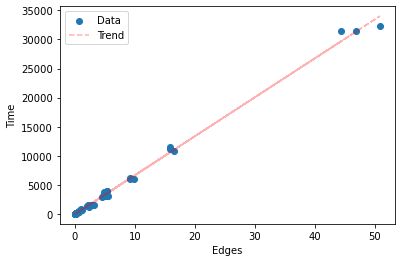

In [36]:
import numpy as np
import matplotlib.pyplot as plt
y = df['edges_number']
x = df['run_time']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Edges')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

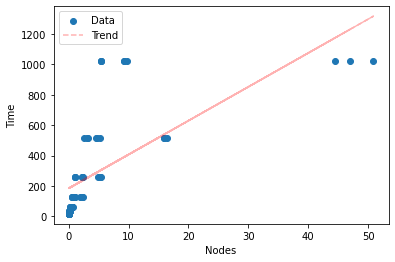

In [37]:
import numpy as np
import matplotlib.pyplot as plt
y = df['nodes_number']
x = df['run_time']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
# ax.set_title('Number of Nodes VS Run Time')
ax.legend()

plt.show()